In [1]:
cd /home/andre/PycharmProjects/

/home/andre/PycharmProjects


In [2]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

In [3]:
# Interval size in seconds 
day="86400" # ("86400" = 1 day intervals)
min="60"
min30="1800"
min15="900"
h1="3600"
h4="7200"

### Source of DATA real time delayed

https://finance.google.com/finance?q=BVMF%3APETR4&ei=6uVxWoHlCJa6eqmevKgP

In [4]:
# Dow Jones
param = {
	'q': "ELET3", # Stock symbol (ex: "AAPL")
	'i': min30, # Interval size in seconds 
	'x': "BVMF", # Stock exchange symbol on which stock is traded (ex: "NASD")
	'p': "1Y" # Period (Ex: "1Y" = 1 year)
}
# get price data (return pandas dataframe)
df = get_price_data(param)
print(df)

                      Open   High    Low  Close  Volume
2017-02-01 10:30:00  21.24  21.30  21.01  21.10   13300
2017-02-01 11:00:00  21.18  21.27  20.97  21.27   41500
2017-02-01 11:30:00  21.27  21.63  21.27  21.51   61200
2017-02-01 12:00:00  21.50  21.55  21.33  21.35   57000
2017-02-01 12:30:00  21.36  21.37  21.09  21.10   58100
2017-02-01 13:00:00  21.13  21.24  21.05  21.20   66000
2017-02-01 13:30:00  21.16  21.16  20.94  21.01   71900
2017-02-01 14:00:00  21.00  21.01  20.82  20.95  121700
2017-02-01 14:30:00  20.92  20.96  20.83  20.88   70500
2017-02-01 15:00:00  20.88  20.89  20.79  20.80  109900
2017-02-01 15:30:00  20.80  20.90  20.79  20.82   72400
2017-02-01 16:00:00  20.81  20.91  20.79  20.82   67900
2017-02-01 16:30:00  20.83  20.85  20.79  20.80   78400
2017-02-02 10:00:00  20.99  20.99  20.99  20.99     200
2017-02-02 10:30:00  20.98  21.27  20.87  21.24   23000
2017-02-02 11:00:00  21.23  21.29  21.01  21.09   49100
2017-02-02 11:30:00  21.07  21.28  21.05  21.28 

### Convert Volume to Millions of Reais

In [5]:
%matplotlib qt5

In [6]:
df.Volume *= 10**-6
from datetime import date
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import numpy as np

In [8]:
fig = plt.figure(figsize=(19,10))
ax1 = plt.subplot(211);
xi = list(range(df.index.size))# x indexes to overwright aver
plt.plot(xi, df.Close,'-.', ms=0.5, c='b');
plt.plot(xi, df.Close,'d', c='k', alpha=0.7);
plt.setp(ax1.get_xticklabels(), visible=False);
plt.ylabel('Price R$');
plt.ylim(16.5, 20.5)
plt.grid()

# share x only
ax2 = plt.subplot(212, sharex=ax1);
ax2.bar(xi, df.Volume, width=0.3)
# make these tick labels invisible
plt.ylabel('Volume MM R$');
# overwright the x axis completely
plt.xticks(xi[::50], df.index[::50]);
plt.setp(ax2.get_xticklabels(), fontsize=10);
plt.xlim(3000, 3200)
plt.show()
plt.grid()

###  LAST DAY VIEW

In [11]:
# PETR4
param = {
	'q': "PETR4", # Stock symbol (ex: "AAPL")
	'i': min, # Interval size in seconds 
	'x': "BVMF", # Stock exchange symbol on which stock is traded (ex: "NASD")
	'p': "1D" # Period (Ex: "1Y" = 1 year)
}
# get price data (return pandas dataframe)
df = get_price_data(param)

In [12]:
print(df.index.size)
df.tail()

406


,Open,High,Low,Close,Volume
2018-01-31 16:52:00,19.84,19.85,19.84,19.85,38900
2018-01-31 16:53:00,19.84,19.85,19.84,19.85,120000
2018-01-31 16:54:00,19.85,19.86,19.84,19.86,40300
2018-01-31 16:55:00,19.85,19.87,19.85,19.86,160700
2018-01-31 16:56:00,19.86,19.86,19.84,19.86,57800


### Convert Volume to Millions of Reais

In [13]:
df.Volume *= 10**-6
from datetime import date
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import numpy as np

In [14]:
fig = plt.figure(figsize=(19,10))
ax1 = plt.subplot(211);
xi = list(range(df.index.size))# x indexes to overwright aver
plt.plot(xi, df.Close,'-.', ms=0.3, c='b');
plt.plot(xi, df.Close,'d', c='k', alpha=0.7);
plt.setp(ax1.get_xticklabels(), visible=False);
plt.ylabel('Price R$');
#plt.ylim(19.60, 19.95)

# share x only
ax2 = plt.subplot(212, sharex=ax1);
ax2.bar(xi, df.Volume, width=0.3)
# make these tick labels invisible
plt.ylabel('Volume MM R$');
# overwright the x axis completely
plt.xticks(xi[::500], df.index[::500]);
plt.setp(ax2.get_xticklabels(), fontsize=10);
#plt.xlim(450, 600)
#plt.ylim(0, 1.5)

### Calculate Volume at price Histogram considering all data

In [15]:
plt.figure(figsize=(10,4))
vdf = df.set_index(df.Close)
vdf.Close.hist(bins=50)

In [16]:
vdfby = df.groupby('Close').sum()
vdfby.head()

,Open,High,Low,Volume
Close,,,,
19.69,19.70,19.71,19.68,0.1641
19.71,78.81,78.86,78.77,0.4268
19.72,39.50,39.51,39.40,0.3695
19.73,39.45,39.48,39.43,0.2875
19.74,98.74,98.77,98.65,0.5447


In [18]:
plt.figure(figsize=(10,5))
plt.bar(vdfby.index, vdfby.Volume, width=0.005)
plt.ylabel('Volume MM R$')
plt.xlabel('Price in R$')
plt.title('Volume at @ price')
plt.xlim(19.75,19.95)
plt.grid()

###  LAST MONTH VIEW

In [17]:
# PETR4
param = {
	'q': "PETR4", # Stock symbol (ex: "AAPL")
	'i': min, # Interval size in seconds 
	'x': "BVMF", # Stock exchange symbol on which stock is traded (ex: "NASD")
	'p': "1M" # Period (Ex: "1Y" = 1 year)
}
# get price data (return pandas dataframe)
df = get_price_data(param)

In [18]:
print(df.index.size)
df.head()

5742


,Open,High,Low,Close,Volume
2018-01-11 10:06:00,16.88,16.91,16.88,16.89,235100
2018-01-11 10:07:00,16.90,16.91,16.89,16.90,65200
2018-01-11 10:08:00,16.90,16.91,16.89,16.89,104600
2018-01-11 10:09:00,16.90,16.91,16.89,16.91,110600
2018-01-11 10:10:00,16.91,16.92,16.90,16.91,76700


In [19]:
df.tail()

,Open,High,Low,Close,Volume
2018-01-31 16:52:00,19.84,19.85,19.84,19.85,38900
2018-01-31 16:53:00,19.84,19.85,19.84,19.85,120000
2018-01-31 16:54:00,19.85,19.86,19.84,19.86,40300
2018-01-31 16:55:00,19.85,19.87,19.85,19.86,160700
2018-01-31 16:56:00,19.86,19.86,19.84,19.86,57800


### Convert Volume to Millions of Reais

In [20]:
df.Volume *= 10**-6
from datetime import date
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import numpy as np

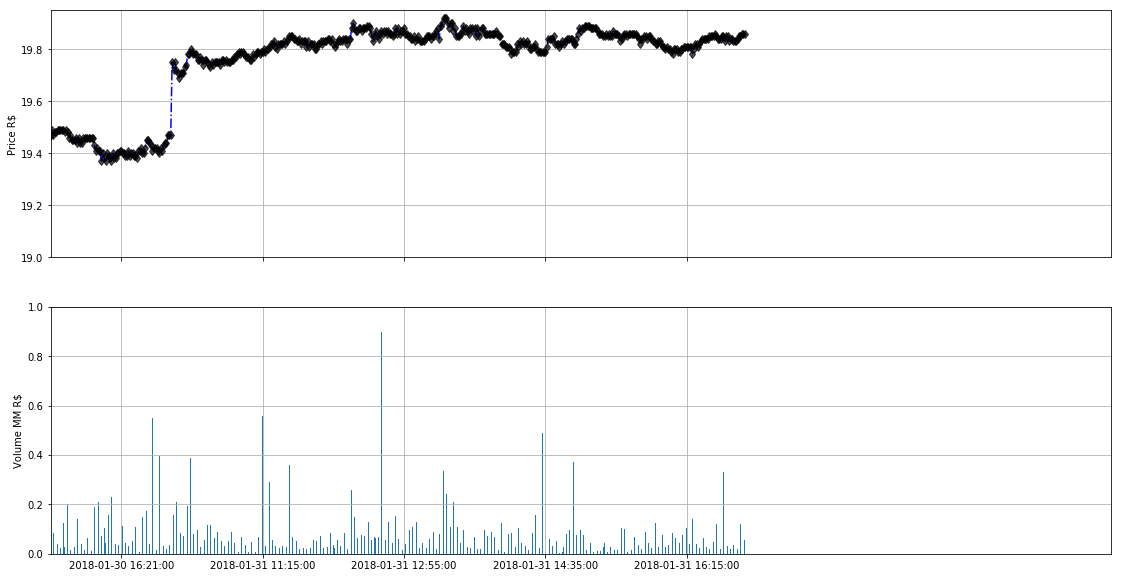

In [21]:
fig = plt.figure(figsize=(19,10))
ax1 = plt.subplot(211);
xi = list(range(df.index.size))# x indexes to overwright aver
plt.plot(xi, df.Close,'-.', ms=0.3, c='b');
plt.plot(xi, df.Close,'d', c='k', alpha=0.7);
plt.setp(ax1.get_xticklabels(), visible=False);
plt.ylabel('Price R$');
plt.ylim(19.00, 19.95)
plt.grid()

# share x only
ax2 = plt.subplot(212, sharex=ax1);
ax2.bar(xi, df.Volume, width=0.3)
# make these tick labels invisible
plt.ylabel('Volume MM R$');
# overwright the x axis completely
plt.xticks(xi[::100], df.index[::100]);
plt.setp(ax2.get_xticklabels(), fontsize=10);
plt.xlim(5250, 6000)
plt.ylim(0, 1.0)
plt.grid()

### Calculate Volume at price Histogram considering all data

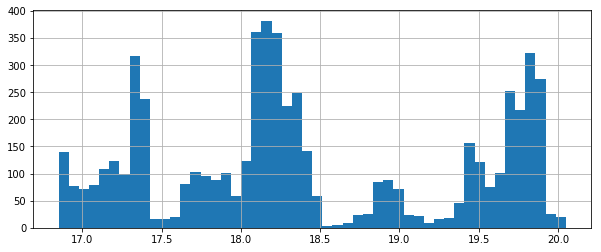

In [22]:
plt.figure(figsize=(10,4))
vdf = df.set_index(df.Close)
vdf.Close.hist(bins=50)

In [23]:
vdfby = df.groupby('Close').sum()
vdfby.head()

,Open,High,Low,Volume
Close,,,,
16.85,16.86,16.86,16.85,0.0685
16.86,16.88,16.89,16.86,0.1878
16.87,50.59,50.62,50.56,0.1706
16.88,219.53,219.63,219.43,0.9381
16.89,827.83,828.10,827.45,1.9001


(19.0, 20)

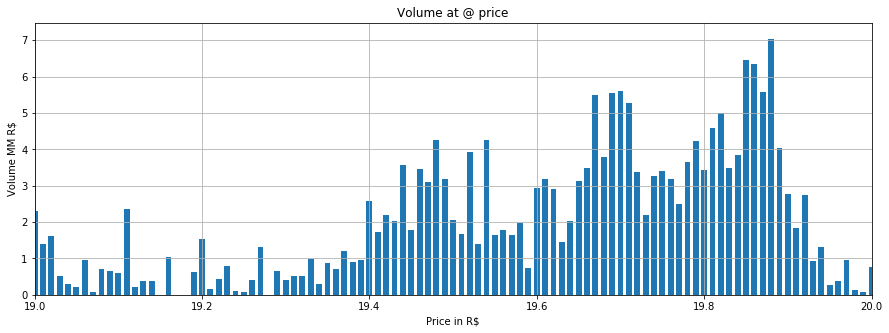

In [25]:
plt.figure(figsize=(15,5))
plt.bar(vdfby.index, vdfby.Volume, width=0.007)
plt.ylabel('Volume MM R$')
plt.xlabel('Price in R$')
plt.title('Volume at @ price')
plt.grid(which='both')
plt.xlim(19.0,20)